In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python-headless

In [ ]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/GEN-AI/Harcascade/haarcascade_frontalface_default.xml')
classifier=load_model('/content/drive/MyDrive/GEN-AI/Models/model_v_47.hdf5')
class_labels={0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


1/1 [==============================] - 0s 49ms/step
Predicted class index: 4
Predicted emotion: Neutral


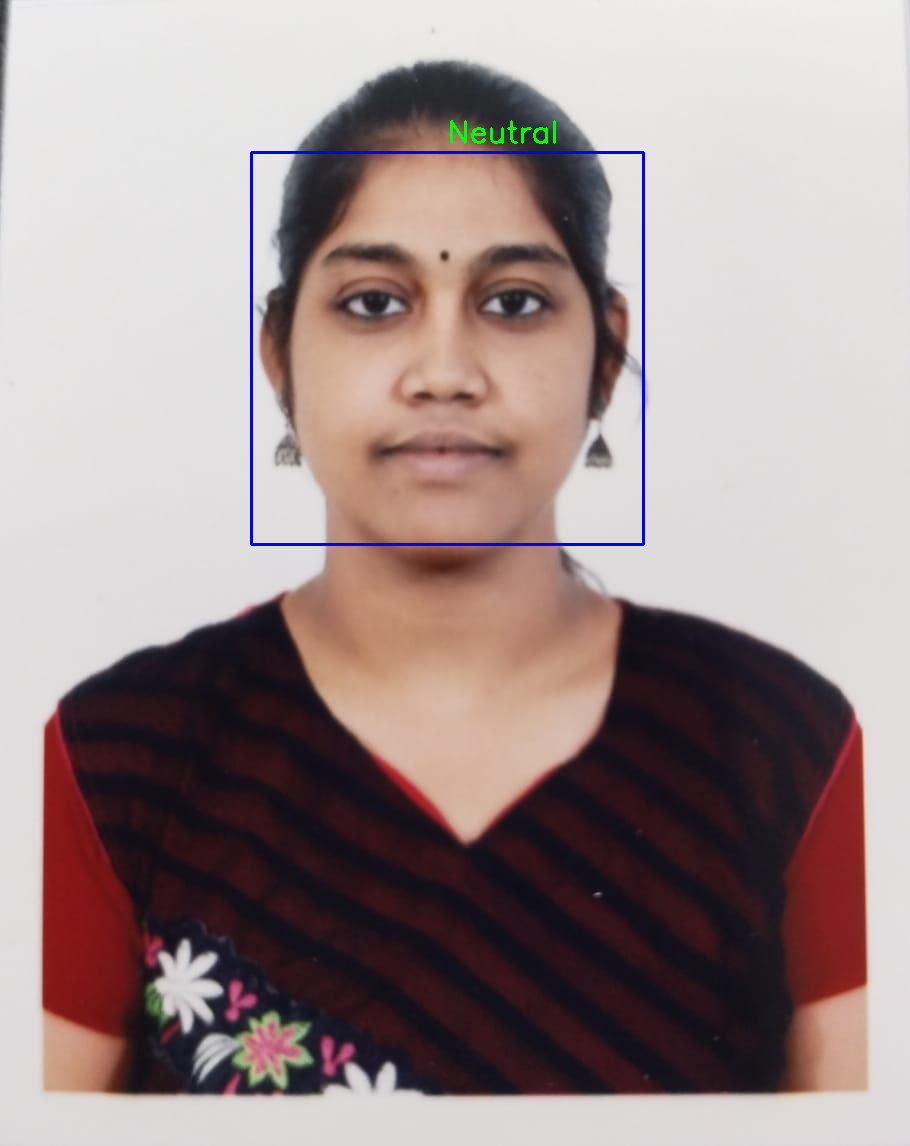

True

In [9]:
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/GEN-AI/test_img/img1.jpg")
gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
allfaces = []
rects = []
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
    allfaces.append(roi_gray)
    rects.append((x, w, y, h))
i = 0
for face in allfaces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)
    preds = classifier.predict(roi)[0]
    print("Predicted class index:", preds.argmax())
    print("Predicted emotion:", class_labels[preds.argmax()])
    label = class_labels[preds.argmax()]
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i += 1
    cv2.putText(img, label, label_position , cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

cv2_imshow(img)
cv2.imwrite("detectedimg.jpg", img)
